In [7]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [8]:
# Parameters
image_size = (128, 128)
batch_size = 32
validation_split = 0.2

dataset_dir = r"D:\Ashraf\NCI\Semester 2\DMML2\CA2\Dataset\PlantVillage"

datagen = ImageDataGenerator(rescale=1./255, validation_split=validation_split)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


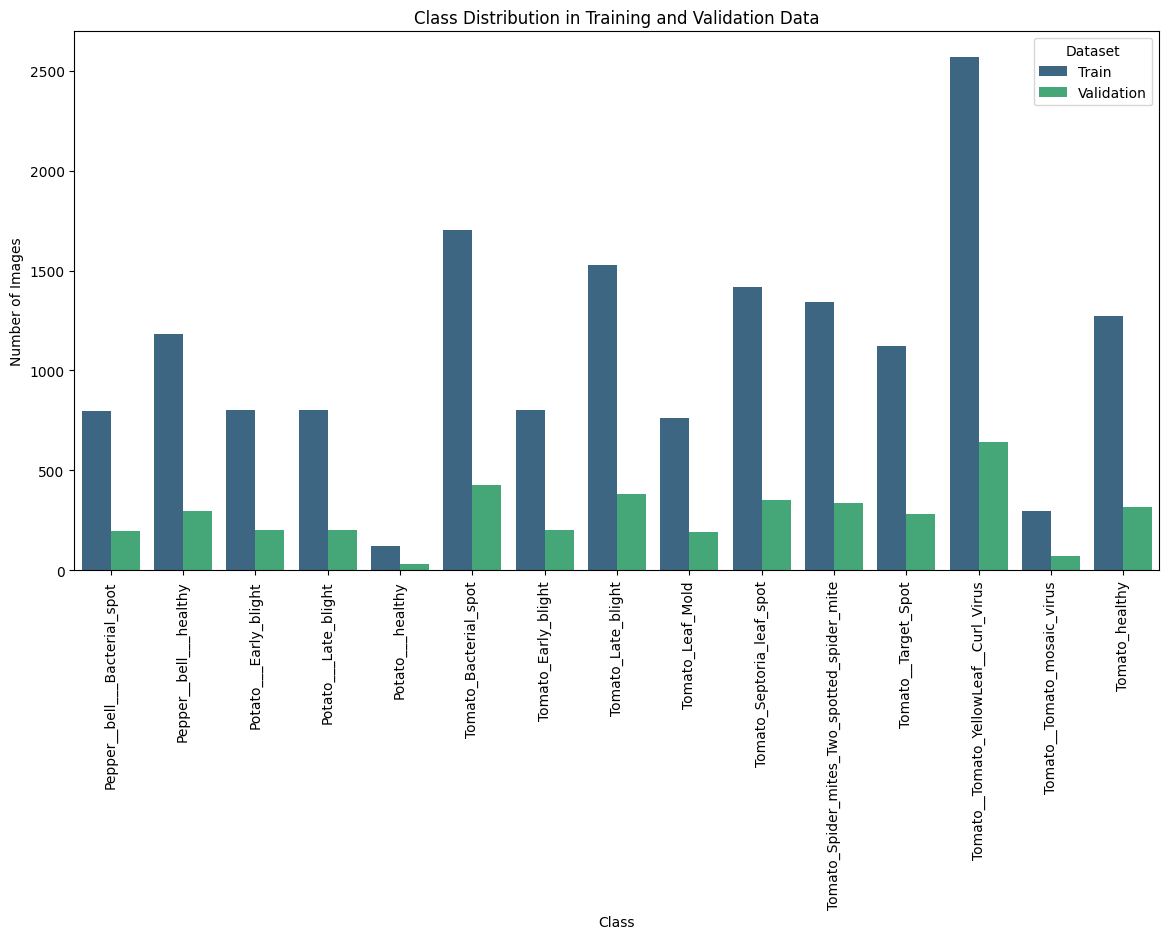

In [9]:
def plot_class_distribution(train_gen, val_gen, title):
    train_class_counts = Counter(train_gen.classes)
    val_class_counts = Counter(val_gen.classes)
    
    class_labels = {v: k for k, v in train_gen.class_indices.items()}
    class_names = [class_labels[i] for i in range(len(class_labels))]
    
    train_counts = [train_class_counts[i] for i in range(len(class_labels))]
    val_counts = [val_class_counts[i] for i in range(len(class_labels))]
    
    combined_counts = pd.DataFrame({
        'Class': class_names,
        'Train': train_counts,
        'Validation': val_counts
    })

    combined_counts = pd.melt(combined_counts, id_vars=['Class'], value_vars=['Train', 'Validation'], var_name='Dataset', value_name='Count')
    
    plt.figure(figsize=(14, 7))
    sns.barplot(x='Class', y='Count', hue='Dataset', data=combined_counts, palette="viridis")
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=90)
    plt.legend(title='Dataset')
    plt.show()

plot_class_distribution(train_generator, validation_generator, 'Class Distribution in Training and Validation Data')